In [61]:
from mlos.Grpc.OptimizerMonitor import OptimizerMonitor
import grpc
# create a grpc channel and instantiate the OptimizerMonitor
channel = grpc.insecure_channel('127.0.0.1:50051')
optimizer_monitor = OptimizerMonitor(grpc_channel=channel)
optimizer_monitor

OptimizerMonitor(grpc_channel='127.0.0.1:50051')

In [62]:
optimizers = optimizer_monitor.get_existing_optimizers()
optimizers

In [63]:
optimizer = optimizers[0]
features_df, objectives_df =  optimizer.get_all_observations()


In [64]:
import pandas as pd
features, targets = optimizer.get_all_observations()
data = pd.concat([features, targets], axis=1)
data


,cache_implementation,mru_cache_config.cache_size,lfu_cache_config.cache_size,lru_cache_config.cache_size,HitRate
0,LeastRecentlyUsed,NaN,NaN,100.0,0.000000
1,LeastFrequentlyUsed,NaN,714.0,NaN,0.664700
2,MostRecentlyUsed,2050.0,NaN,NaN,0.995832
3,LeastFrequentlyUsed,NaN,3641.0,NaN,0.995832
4,MostRecentlyUsed,627.0,NaN,NaN,0.408421
...,...,...,...,...,...
95,LeastFrequentlyUsed,NaN,578.0,NaN,0.664700
96,LeastRecentlyUsed,NaN,NaN,1812.0,0.995832
97,LeastFrequentlyUsed,NaN,531.0,NaN,0.664700
98,LeastRecentlyUsed,NaN,NaN,1084.0,0.678221


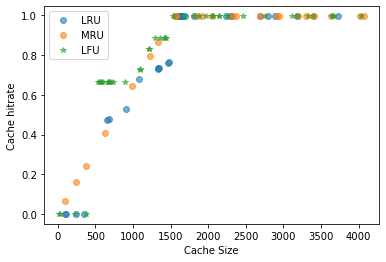

In [65]:
lfu_data, lru_data, mru_data = data.groupby('cache_implementation')
#print(list(data.groupby('cache_implementation')))

import matplotlib.pyplot as plt
line_lru = lru_data[1].plot(x='lru_cache_config.cache_size', y='HitRate', label='LRU', marker='o', linestyle='none', alpha=.6)
mru_data[1].plot(x='mru_cache_config.cache_size', y='HitRate', label='MRU', marker='o', linestyle='none', alpha=.6, ax=plt.gca())
lfu_data[1].plot(x='lfu_cache_config.cache_size', y='HitRate', label='LFU', marker='*', linestyle='none', alpha=.6, ax=plt.gca())
plt.ylabel("Cache hitrate")
plt.xlabel("Cache Size")
plt.legend()